First, lets reconstruct dimuon z mass.
reaplying previous code. Using the following criteria to select two well-defined and isolated muons.

In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import uproot_methods
import ROOT
import boost_histogram as bh
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.20/06


In [2]:
file=uproot.open('~/Downloads/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-pythia8.root')['Events']
#file=uproot.open('~/Downloads/FE9779A1-B793-2644-9A14-3E105B03B488.root')['Events']
# !!!!!!!!! Muon_pfRelIso03_chg-chargedhadroniso
muon=file.arrays(['Muon_pt','Muon_eta','Muon_phi','Muon_mass',
                  'Muon_charge','Muon_isGlobal','Muon_genPartIdx',
                  'GenPart_pt', 'GenPart_eta', 'GenPart_phi', 
                  'GenPart_mass'], namedecode='utf-8')

In [3]:
gen=file.arrays(['GenPart_pt', 'GenPart_eta', 'GenPart_phi', 'GenPart_mass'], namedecode='utf-8')

In [4]:
muons=ak.JaggedArray.zip(pt=muon['Muon_pt'], eta=muon['Muon_eta'], 
                         phi=muon['Muon_phi'], mass=muon['Muon_mass'], 
                         charge=muon['Muon_charge'], genidx=muon['Muon_genPartIdx'] )
gens=ak.JaggedArray.zip(pt=muon['GenPart_pt'], eta=muon['GenPart_eta'],
                              phi=muon['GenPart_phi'], mass=muon['GenPart_mass'],)

In [5]:
muon_mask=(muon['Muon_genPartIdx']!=-1)& (muon['Muon_isGlobal']==1)& (muon['Muon_pt']>20)& (abs(muon['Muon_eta'])<2.4)

In [6]:
muons_good=muons[muon_mask]

In [7]:
(muon_mask.sum()==2).sum()

57174

In [8]:
(muon_mask.sum()==3).sum()

27

In [9]:
(muon_mask.sum()==1).sum()

42958

Note here if we write a for loop, then 42958 events are don't woth to loop over it. By using columnar method, time is saved.

In [10]:
(muon_mask.sum()==4).sum()

1

In [11]:
(muon_mask.sum()==5).sum()

0

In [12]:
(muon_mask.sum()==6).sum()

0

In [13]:
two_good_muons=muons_good[muon_mask.sum()==2]

In [14]:
two_good_muons.charge

<JaggedArray [[1 -1] [1 -1] [1 -1] ... [-1 1] [-1 1] [-1 1]] at 0x7fc6e4695150>

Lets make sure muons in eaach events have opposite charge

In [15]:
opposite_sign_muon_mask=(two_good_muons.charge[:,0]!=two_good_muons.charge[:,1])

In [16]:
two_opposite_good_muons=two_good_muons[opposite_sign_muon_mask]
opposite_sign_muon_mask.sum()

57165

In [17]:
two_muon_p4=uproot_methods.TLorentzVectorArray.from_ptetaphim(two_opposite_good_muons.pt, two_opposite_good_muons.eta,
                                                              two_opposite_good_muons.phi, two_opposite_good_muons.mass)

In [18]:
dimuon_p4=two_muon_p4[:,0]+two_muon_p4[:,1]
#dimuon_p4.mass

In [19]:
dimuon_mass_mask=(dimuon_p4.mass>70)&(dimuon_p4.mass<110)

Text(0, 0.5, 'Events')

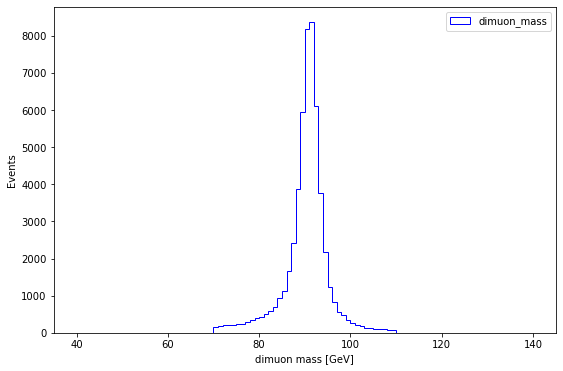

In [20]:
plt.figure(figsize=(9,6))
plt.hist(dimuon_p4.mass[dimuon_mass_mask], bins=100, range=[40,140], histtype='step', color='blue', label='dimuon_mass')
plt.legend()
plt.xlabel('dimuon mass [GeV]')
plt.ylabel('Events')

Now lets get their corresponding genpart and gen dimuon mass.

In [21]:
idx=two_opposite_good_muons.genidx
pf_gen_muons=((gens[muon_mask.sum()==2])[opposite_sign_muon_mask])[idx]

In [22]:
two_gen_muon_p4=uproot_methods.TLorentzVectorArray.from_ptetaphim(pf_gen_muons.pt, pf_gen_muons.eta,
                                                                  pf_gen_muons.phi, pf_gen_muons.mass)

In [23]:
gen_dimuon_p4=two_gen_muon_p4[:,0]+two_gen_muon_p4[:,1]

Text(0, 0.5, 'Events')

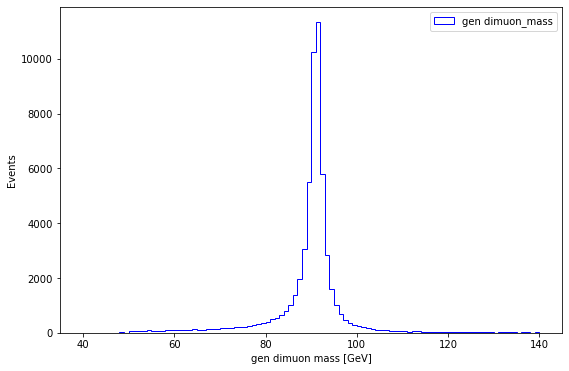

In [24]:
plt.figure(figsize=(9,6))
n=plt.hist(gen_dimuon_p4.mass, bins=100, range=[40,140], histtype='step', color='blue', label='gen dimuon_mass')
plt.legend()
plt.xlabel('gen dimuon mass [GeV]')
plt.ylabel('Events')

In [25]:
n

(array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 1.1000e+01, 7.0000e+00,
        6.6000e+01, 7.1000e+01, 7.6000e+01, 7.2000e+01, 8.8000e+01,
        7.8000e+01, 6.6000e+01, 7.9000e+01, 9.4000e+01, 8.7000e+01,
        1.1400e+02, 9.4000e+01, 9.3000e+01, 1.1300e+02, 1.2200e+02,
        1.1600e+02, 1.1800e+02, 1.3600e+02, 1.4100e+02, 1.5300e+02,
        1.6400e+02, 1.6800e+02, 1.8600e+02, 2.0600e+02, 2.1000e+02,
        2.0600e+02, 2.3800e+02, 2.9400e+02, 3.1600e+02, 3.4900e+02,
        4.0100e+02, 4.8600e+02, 5.3700e+02, 6.3700e+02, 7.9200e+02,
        1.0010e+03, 1.3740e+03, 1.9470e+03, 3.0710e+03, 5.4970e+03,
        1.0240e+04, 1.1339e+04, 5.8100e+03, 2.8580e+03, 1.6080e+03,
        1.0030e+03, 6.7500e+02, 4.6400e+02, 3.5900e+02, 2.8600e+02,
        2.4900e+02, 2.2100e+02, 1.8300e+02, 1.2600e+02, 1.1000e+02,
        1.0200e+02, 9.0000e+01, 8.3000e+01, 5.7000e+01, 6.7000e+01,
        7.5000e+01, 4.7000e+01, 5.1000e+01, 5.10

In [26]:
def relativistic_breit_wigner(x, resonance_mass, width, normalization):
    gamma = np.sqrt(resonance_mass ** 2 * (resonance_mass ** 2 + width ** 2))
    k = 2.0 * np.sqrt(2) * resonance_mass * width * gamma / (np.pi * np.sqrt(resonance_mass ** 2 + gamma))
    return normalization * k / ((x ** 2 - resonance_mass ** 2) ** 2 + resonance_mass ** 2 * width ** 2)

popt, pcov = curve_fit(relativistic_breit_wigner, n[1], n[0], p0=[90, 10, 1000], sigma=np.sqrt(n[0]))

plt.hist(gen_dimuon_p4.mass, bins=40, range=(70, 110), label='Data')
x = np.linspace(80, 100, 200)
y = relativistic_breit_wigner(x, *popt)
plt.plot(x, y, label='Fit')
plt.xlabel('Dimuon invariant mass [GeV]')
plt.ylabel('Number of dimuon events / 1 MeV')
plt.legend()
plt.show()

/Users/tarantula/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:755: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma


ValueError: operands could not be broadcast together with shapes (101,) (100,) 

Now lets plot some profile histogram

In [28]:
prof_MuPlusPhiVsDiMuonM=ROOT.TProfile("prof_MuPlusPhivsDiMuonM","#mu^{+} #phi vs m_{#mu^{+}#mu^{-}};Reco muon(+) #phi[rad]; Z peak position [GeV/c^2]",16,-3.14,3.14,88,93)

In [33]:
mup_phi=two_opposite_good_muons.phi[two_opposite_good_muons.charge>0].flatten()

In [37]:
for phi, m in zip(mup_phi[dimuon_mass_mask], (dimuon_p4.mass)[dimuon_mass_mask]):
   prof_MuPlusPhiVsDiMuonM.Fill(phi, m, 1)

In [42]:
c1 = ROOT.TCanvas("mupphidimum","",900,600)
prof_MuPlusPhiVsDiMuonM.Draw()

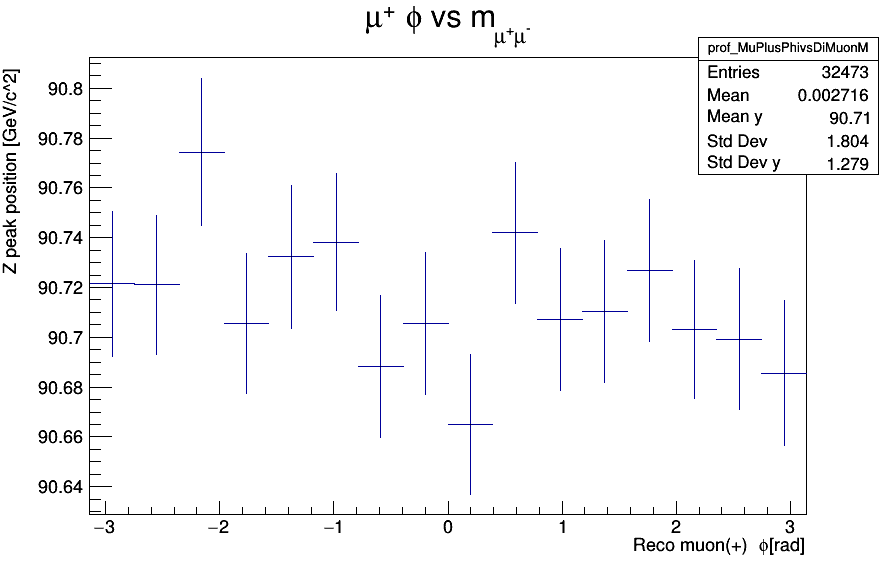

In [43]:
c1.Draw()

In [45]:
mum_phi=two_opposite_good_muons.phi[two_opposite_good_muons.charge<0].flatten()
prof_MuMinusPhivsDiMuonM = ROOT.TProfile("prof_MuMinusPhivsDiMuonM","#mu^{-} #phi vs m_{#mu^{+}#mu^{-}};Reco muon(-) #phi[rad];Z peak position [GeV/c^2]",16,-3.14,3.14,88,93)

In [47]:
for phi, m in zip(mum_phi[dimuon_mass_mask], (dimuon_p4.mass)[dimuon_mass_mask]):
   prof_MuMinusPhivsDiMuonM.Fill(phi, m, 1)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: mumphidimum


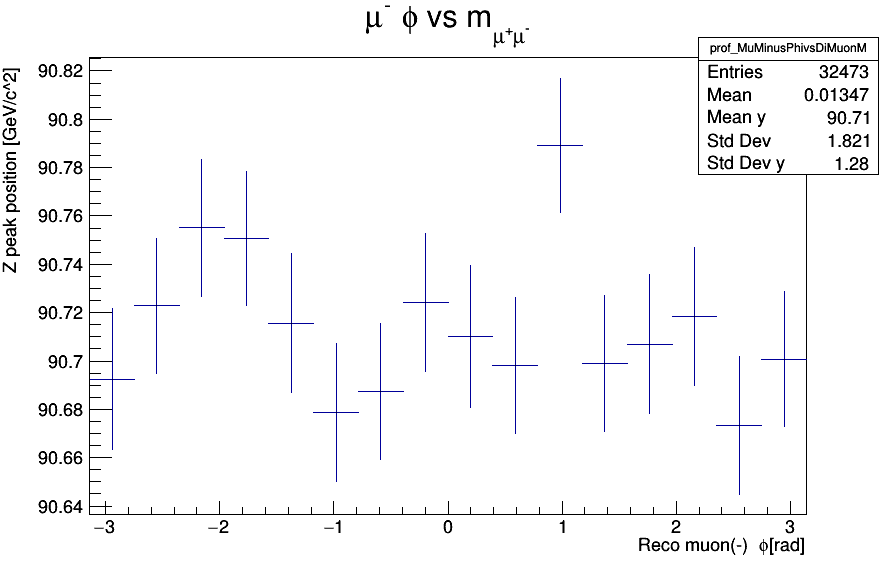

In [49]:
c2 = ROOT.TCanvas("mumphidimum","",900,600)
prof_MuMinusPhivsDiMuonM.Draw()
c2.Draw()

In [56]:
prof_MuEtavsDiMuonM = ROOT.TProfile("prof_MuEtavsDiMuonM","Muon #eta vs m_{#mu^{+}#mu^{-}};Reco Muon #eta; Z peak position [GeV/c^2]",50,-2.4,2.4,88,93)

In [57]:
for eta1, eta2, m in zip(two_opposite_good_muons[dimuon_mass_mask].eta[:,0],
                         two_opposite_good_muons[dimuon_mass_mask].eta[:,0],
                         dimuon_p4.mass[dimuon_mass_mask]):
    prof_MuEtavsDiMuonM.Fill(eta1, m, 1)
    prof_MuEtavsDiMuonM.Fill(eta2, m, 1)
    

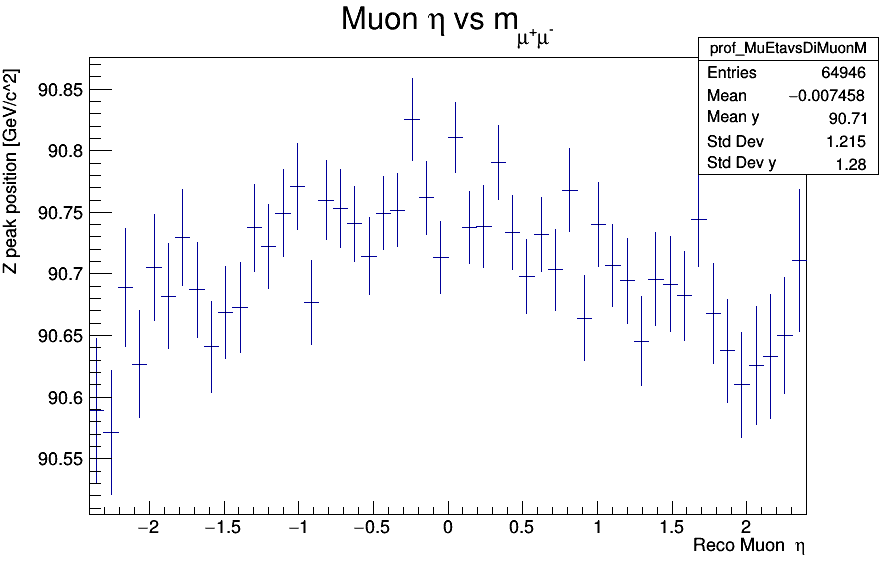

In [58]:
c3 = ROOT.TCanvas("muetadimum","",900,600)
prof_MuEtavsDiMuonM.Draw()
c3.Draw()

Step 3: Investigate the muon transverse momentum resolution

Text(0, 0.5, 'Events')

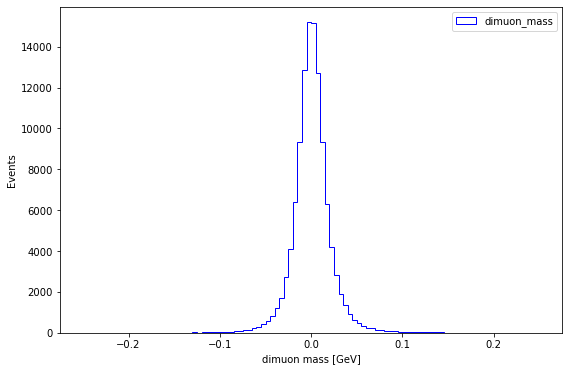

In [70]:
pt_res=two_gen_muon_p4.pt.flatten()/two_opposite_good_muons.pt.flatten()-1
plt.figure(figsize=(9,6))
plt.hist(pt_res, bins=100, range=[-0.25,0.25], histtype='step', color='blue', label='dimuon_mass')
plt.legend()
plt.xlabel('dimuon mass [GeV]')
plt.ylabel('Events')

In [75]:
mass_res=dimuon_p4.mass.flatten()/gen_dimuon_p4.mass.flatten()-1

Text(0, 0.5, 'Events')

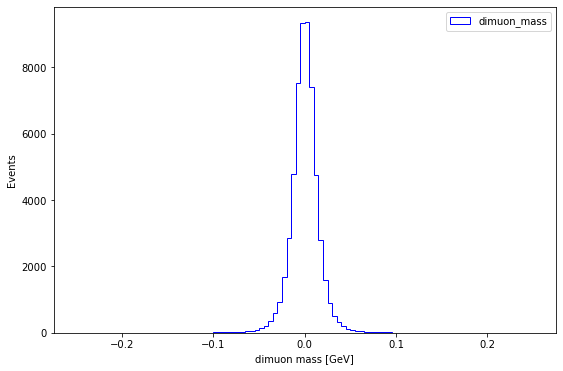

In [77]:
plt.figure(figsize=(9,6))
plt.hist(mass_res, bins=100, range=[-0.25,0.25], histtype='step', color='blue', label='dimuon_mass')
plt.legend()
plt.xlabel('dimuon mass [GeV]')
plt.ylabel('Events')

In [ ]:
hm = bh.Histogram(
    bh.axis.Regular(14, -3.5, 3.5, underflow=False, overflow=False),
    storage=bh.storage.Mean(),
)

hm.fill(mup_phi[dimuon_mass_mask], sample=(dimuon_p4.mass)[dimuon_mass_mask])

In [ ]:
print(np.sqrt(hm.view().variance),
hm.axes[0].centers,
hm.view().value)

In [ ]:
# Plot
#fig, ax = plt.subplots()
#ax.hist2d(mup_phi, dimuon_p4.mass, bins=100, cmap="gray_r")
plt.figure(figsize=(16,12))
plt.ylabel('Events')
plt.yticks(np.arange(70,110,40))
plt.errorbar(hm.axes[0].centers, hm.view().value,
            yerr=np.sqrt(hm.view().variance),
            fmt="ro")
plt.yticks(np.arange(70,110,1))

In [ ]:
plt.figure(figsize=(16,12))
plt.hist2d(mup_phi, dimuon_p4.mass, bins=[1000,5000])
plt.yticks(np.arange(80,100,1))
plt.ylim((80, 100)) 
